# Notebook 4. Klastrowanie
Deadline dla grupy nr 1: 29.10, 23:59, deadline dla grupy nr 2: 30.10, 23:59

Importy, z szczególności nowa funkcjonalność, czyli `checker`.

In [1]:
import numpy as np
from typing import List, Tuple
from checker import checker

## Zadanie 1. Dane do Klastrowania (1 pkt.)
Pierwsze zadanie na rozgrzewkę to stworzenie datasetu do testowania późniejszych algorytmów klastrowania. Proszę zaimplementować poniższe kroki:
1. Wylosować 3 próbki danych z trzech różnych dwuwymiarowych rozkładów normalnych (*hint*: [`np.random.multivariate_normal`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html)). Proszę użyć poniższych średnich i macierzy kowariancji i rozmiarów próbek.
2. Zestackować (*hint*: np. [`np.vstack`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html)) wylosowane próbki w jeden dataset.
3. Stworzyć wektor (jednowymiarowy array) z etykietami, oznaczającymi rozkład z którego została wylosowana dana próbka. Proszę użyć etykiet w postaci `int`, czyli `0, 1, 2`.
4. Wymieszać dane i etykiety (w ten sam sposób!), aby punkty z danego rozkładu nie były "po kolei", *hint*: [`np.random.permutation`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.permutation.html).

In [2]:
@checker(run_tests=True)
def sample_data(means: List[List[float]], 
                covs: List[np.ndarray], 
                sizes: List[int]) -> Tuple[np.ndarray, np.ndarray]:
    """Returns shuffled data sampled from different 2D Gaussians with labels"""
    
    # you code here

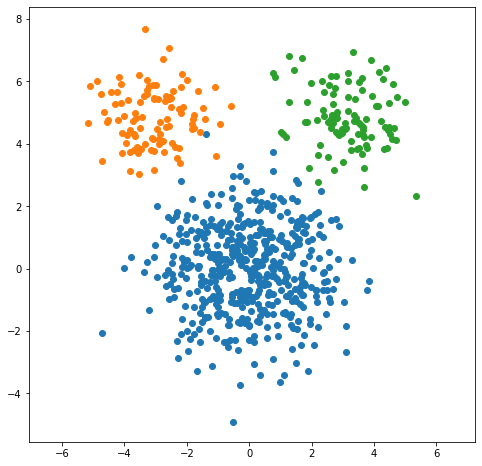

In [3]:
from utils import plot_clustering

means = [[0,0], [-3,5], [3,5]]

cov_1 = 2 * np.eye(2)
cov_2 = np.eye(2)
cov_3 = np.eye(2)
        
covs = [cov_1, cov_2, cov_3]

sizes = [500, 100, 100]

# sample data
X, y = sample_data(means, covs, sizes)
# plot the data
plot_clustering(X, y)

## Zadanie 2. K-Means (3 pkt.)

Zaimplementować algorytm K-Means. Kroki algorytmu znajdują się poniżej.


  0. Wylosuj k punktów z datasetu jako startowe średnie, do losowania proszę użyc [`np.random.choice`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html) uważając na domyślne parametry!
  1. Powtarzaj na zmianę poniższe dwa kroki:
      1. **Przypisanie do grupy:** Dla każdego punktu $x$, przypisz go do średniej $m_i$, która leży najbliżej euklidesowo do niego, czyli znajdź przyporządkowanie:
      $$ S_i = \{x: || x - m_i ||^2 \leq || x - m_j ||^2 \quad \forall j \} $$
      dla $i = 1, .., k$ - etykiety klastrów/grup.
      2. **Znalezienie nowych średnich:** Dla każdej grupy policzyć jej nową średnią:
      $$ m_i = \frac{1}{|S_i|} \sum_{j \in |S_i|} x_j $$
      
  2. Do momentu aż żaden z punktów nie zmieni swojego przyporządkowania w kroku A.

Państwa funkcja powinna zapisywać przydział do grup w każdej iteracji i zwracać listę przydziałów do grup z całego przebiegu algorytmu.


*hint:* do liczenia odległości użyć: [`scipy.spatial.distance.cdist`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist).

In [4]:
from scipy.spatial.distance import cdist

@checker(run_tests=True)
def k_means(X: np.ndarray, k: int) -> List[np.ndarray]:
    """Performs the k-means algorithm for dataset X with k clusters."""
    
    # you code here

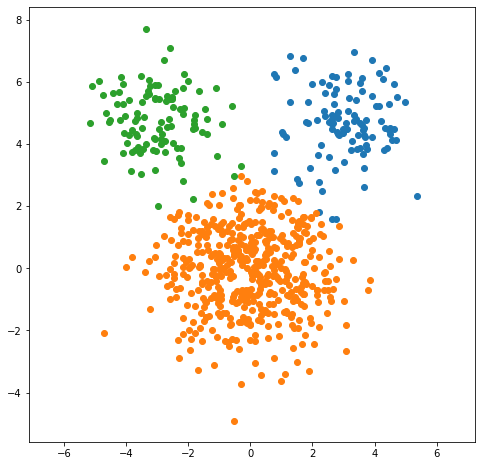

In [5]:
%matplotlib inline

# run k-means
ys = k_means(X, k=3)
# get final clustering
y = ys[-1]
# plot final clustering
plot_clustering(X, y)

In [ ]:
%matplotlib notebook
from utils import animate_clustering

# this seems really wonky, try multiple times if there's a warning about some callback
animate_clustering(X, ys)

# Zadanie 3. Usprawnienia do K-Means (2 pkt.)

1. Ponieważ K-Means bardzo zależy od inicjalizacji (startowe losowe średnie), zmienić funkcje `k_means`, tak aby wykonywała algorytm `n_iters` razy i wybierała tę próbę, dla której *koszt* będzie najmniejszy?

**Pytanie:** jaki jest "koszt" algorytmu k-means?

In [6]:
from scipy.spatial.distance import cdist

@checker(run_tests=True)
def k_means_plus(X: np.ndarray, k: int, n_iters: int = 10) -> List[np.ndarray]:
    """Performs the k-means algorithm for dataset X with k clusters `n_iters` times 
       with different initialisations and return the best run."""
    
    # you code here

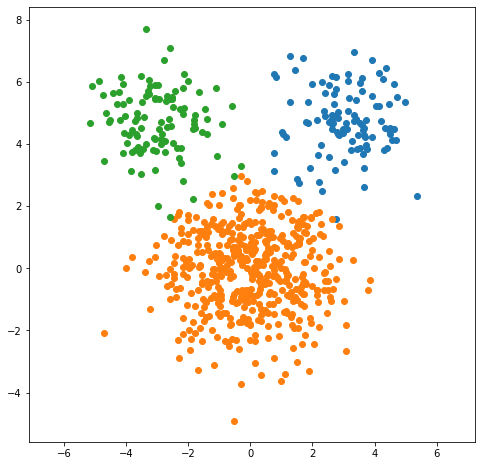

In [7]:
%matplotlib inline
# run k-means
ys = k_means_plus(X, k=3, n_iters=10)
# get final clustering
y = ys[-1]
# plot final clustering
plot_clustering(X, y)

#### 2. Dodać algorytm inicjalizacyjny *k-means++*, polegający na bardziej zaawansowanym wybieraniu startowych średnich:


1. Wybrać pierwszy punkt losowo z całego datasetu.
2. Dla każdego punktu z datasetu, policzyć jego odległość $D(x)$ od **najbliższego** wybranego już punktu.
3. Wybrać kolejny punkt startowy losując z datasetu ważąc prawdopodobieństwo każdego punktu kwadratem policznej odległości $D(x)^2$
4. Powtarzać punkty 2. i 3. aż do wybrania założonej liczby $k$.

*hint*: [`np.random.choice`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html)
  

In [8]:
@checker(run_tests=True)
def k_means_plus_plus(X: np.ndarray, k: int) -> List[np.ndarray]:
    
    # you code here

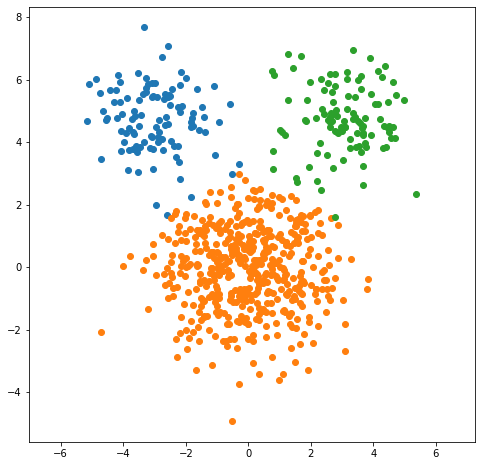

In [9]:
%matplotlib inline

# run k-means
ys = k_means_plus_plus(X, k=3)
# get final clustering
y = ys[-1]
# plot clustering
plot_clustering(X, y)

## Zadanie 4. Wizualizacja klastrowań (1 pkt.)

Proszę zaimplementować funkcję, której zadaniem jest odpalenie różnych klastrowań z pakietu `scikit-learn`. Funkcja powinna zwrócić listę list, gdzie w danym wierszu znajdują się wyniki klastrowania dla poszczególnego datasetu, a elementami wiersza są wyniki poszczególnej metody. 

Metody do zastosowania w tej kolejności: [`K-Means`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering), [`GaussianMixture`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture).

Proszę wszędzie gdzie to jest wymagane podać liczbę klastrów jako 3. W algorytmie `DBSCAN` zalecane podać parametr `eps = 0.3`.
Jako K-Means można oczywiście użyć swojej implementacji.

Użycie biblioteki sklearn na przykładzie algorytmu K-Means znajduje się poniżej. Dużo tutoriali do sk-learna można znaleźć [tutaj](https://scikit-learn.org/stable/tutorial/index.html).

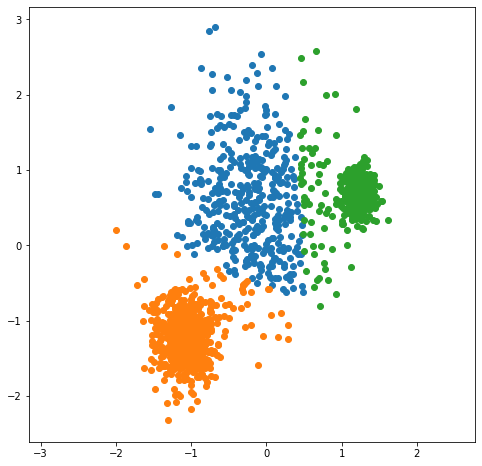

In [10]:
from sklearn.cluster import KMeans
from utils import get_clustering_data

# get some data
X = get_clustering_data()[3]

# initialize the model
model = KMeans(n_clusters=3)

# fit the model: this runs the actual algoritm
model.fit(X)

# get clustering for our 
y = model.predict(X)

# we can alose shothand the fit-predict if we want to predict the same that that we fit on
y = model.fit_predict(X)

# plot the results
plot_clustering(X, y)

In [11]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
from utils import get_clustering_data

@checker(run_tests=True)
def get_clustering_results(datasets: List[np.ndarray]) -> List[List[np.ndarray]]:
    """Returns list of length len(datasets) with another list with clustering for each
       of the four methods: k-means, dbscan, agglomerative, gmm"""

    # you code here

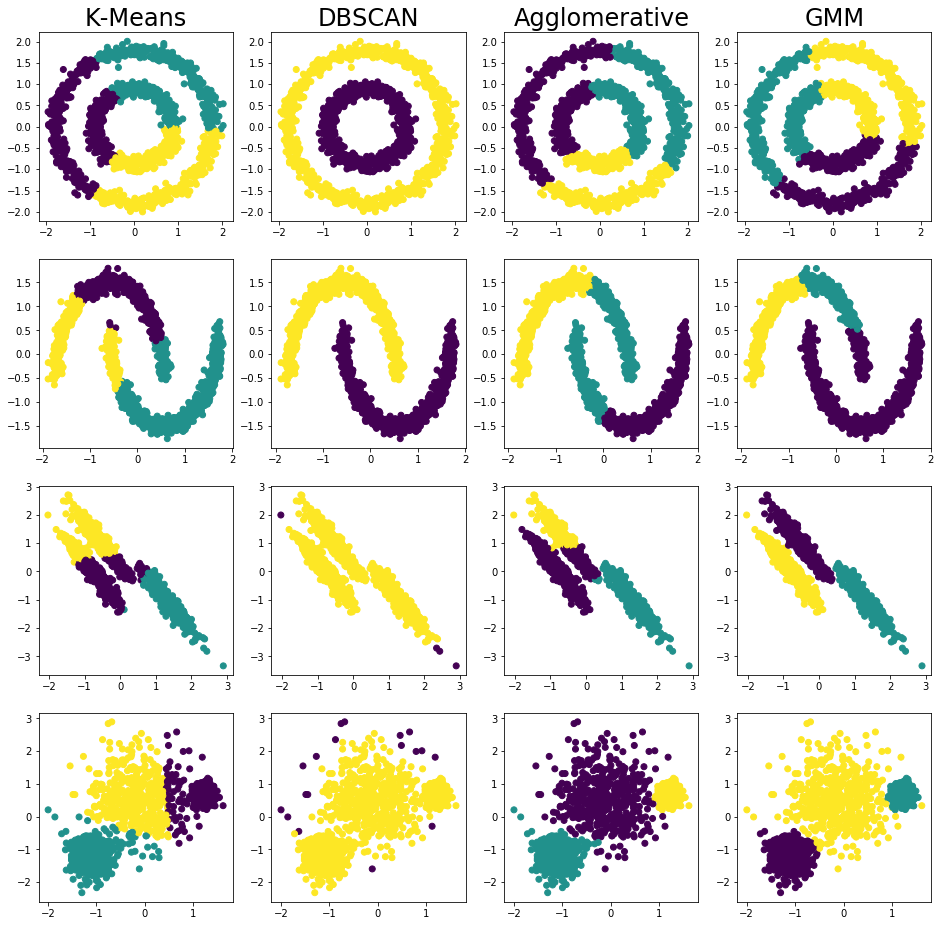

In [12]:
%matplotlib inline
from utils import plot_cluster_comparison

datasets = get_clustering_data()
results = get_clustering_results(datasets)

plot_cluster_comparison(datasets, results)